# Proyecto 2
### Inteligencia Artificial
José Daniel Gómez Cabrera 21429

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [61]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dellg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dellg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dellg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dellg\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dellg\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [62]:
# WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()
# Porter Stemmer
stemmer = PorterStemmer()
# Tokenizer
tokenizer = WhitespaceTokenizer()
# stopwords queue
stop_words = set(stopwords.words('english'))

Read file with codification

In [63]:
spam = pd.read_csv('spam.csv', encoding='ISO-8859-1')
spam = spam[['v1', 'v2']]

Mapping the POS

In [64]:
# Map POS tag to the first character lemmatize() accepts
def get_wordnet_pos(word, tag):
  tag_dict = {
    'J': wordnet.ADJ,
    'N': wordnet.NOUN,
    'V': wordnet.VERB,
    'R': wordnet.ADV
  }
  return tag_dict.get(tag[0].upper(), wordnet.NOUN)

#### EDA
Spam & ham

In [65]:
spam['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

Train & test set

In [66]:
train, test = train_test_split(
  spam.copy(),
  test_size=0.20,
  stratify=spam['v1'],
  random_state=42
)

In [67]:
train['v1'].value_counts()

ham     3859
spam     598
Name: v1, dtype: int64

In [68]:
test['v1'].value_counts()

ham     966
spam    149
Name: v1, dtype: int64

##### Data cleaning

In [69]:
# Lower cases
def toLower(texts):
  return [text.lower() for text in texts]

# Tokenization
def tokenization(texts):
  return [word_tokenize(text) for text in texts]

# Punctuation marks removal
def marksRemoval(texts):
  return [[token for token in text if not re.search(r'\W+', token)] for text in texts]

# number tokens removal
def numTokensRemoval(texts):
  return [[token for token in text if not re.search(r'[0-9]+', token)] for text in texts]

# stopwords removal
def stopwordsRemoval(texts):
  return [[token for token in text if token not in stop_words] for text in texts]

# Lemmatization
def lemmatizater(texts):
  values = [nltk.pos_tag(text) for text in texts]
  return [[lemmatizer.lemmatize(item[0], get_wordnet_pos(item[0], item[1])) for item in value] for value in values]

# stemming
def stemmazer(texts):
  return  [[stemmer.stem(token) for token in text] for text in texts]

##### Model

In [70]:
def processor(texts):
  modelFunctions = [
    toLower,
    tokenization,
    marksRemoval,
    numTokensRemoval,
    stopwordsRemoval,
    lemmatizater,
    stemmazer
  ]

  for func in modelFunctions:
    texts = func(texts)

  return texts

In [71]:
v2 = processor(train['v2'].tolist())
train['v2'] = v2

Dictionary instances

In [73]:
hams = {}
spams = {}

# words counter for each category
def wordCounter(words, wordsDict):
  for word in words:
    if word in wordsDict:
      wordsDict[word] += 1
    else:
      wordsDict[word] = 1

# Update dicts by categories
for _, row in train.iterrows():
  if row['v1'] == 'ham':
    wordCounter(row['v2'], hams)
  elif row['v1'] == 'spam':
    wordCounter(row['v2'], spams)

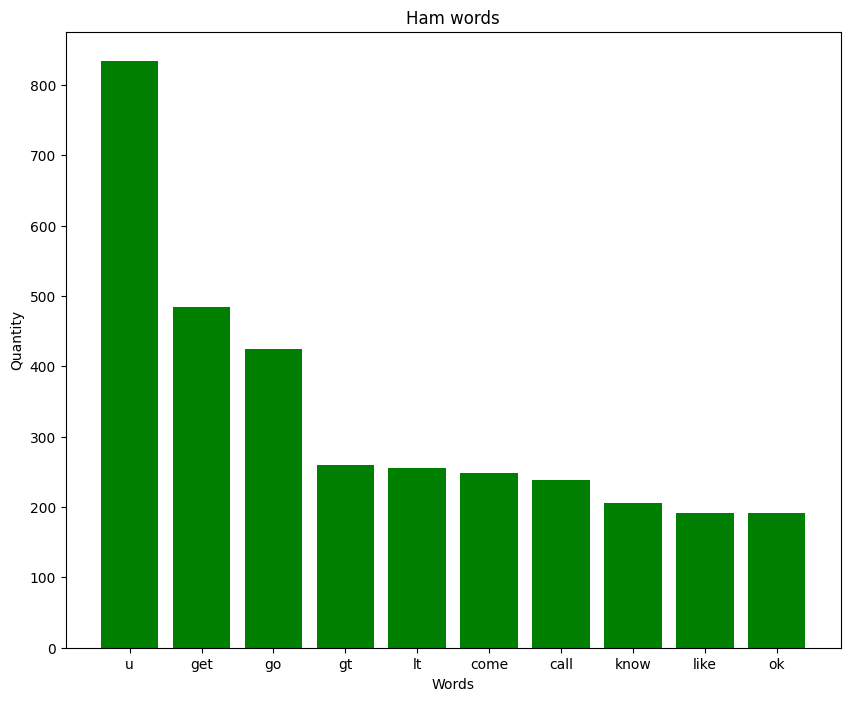

In [78]:
sortedHams = sorted(hams.items(), key=lambda item: item[1], reverse=True)[:10]
words, counts = zip(*sortedHams) # unzip tuples
plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='green')
plt.title('Ham words')
plt.xlabel('Words')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.show()

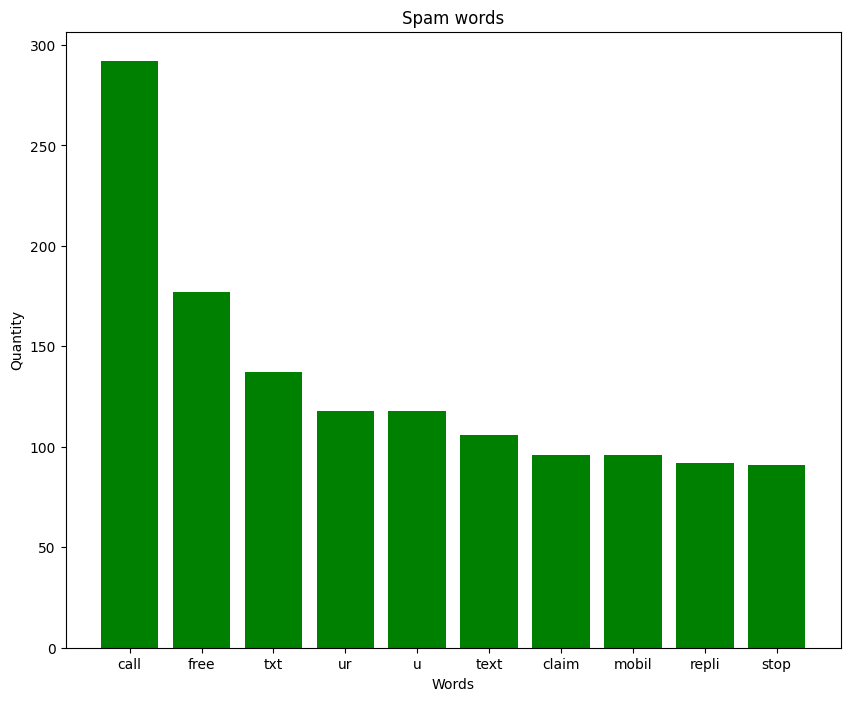

In [79]:
sortedSpams = sorted(spams.items(), key=lambda item: item[1], reverse=True)[:10]
words, counts = zip(*sortedSpams)  # unzip tuples

plt.figure(figsize=(10, 8))
plt.bar(words, counts, color='green')
plt.title('Spam words')
plt.xlabel('Words')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.show()